In [2]:
import os
import re
from collections import defaultdict

# Path to your folder
folder_path = "../data/preprocessed/"

boards = defaultdict(list)

pattern = re.compile(r"^(\d+)_board_\d+\.png$")

for filename in os.listdir(folder_path):
    match = pattern.match(filename)
    if match:
        board_type = match.group(1)
        boards[board_type].append(filename)

result = [files for files in boards.values()]

print(sorted(result[0]))

['17_board_0.png', '17_board_1.png', '17_board_2.png', '17_board_3.png', '17_board_4.png', '17_board_5.png', '17_board_6.png', '17_board_7.png']


In [3]:
import random
from PIL import Image

folder_path = "../data/preprocessed"

def get_image(board_group, folder_path):
    filename = os.path.join(folder_path, random.choice(board_group))
    with Image.open(filename) as img:
        img.load()
    return img

board_group = random.choice(result)
board_group

['11_board_3.png',
 '11_board_0.png',
 '11_board_7.png',
 '11_board_2.png',
 '11_board_6.png',
 '11_board_5.png',
 '11_board_4.png',
 '11_board_1.png']

In [4]:
img = get_image(board_group, folder_path)

board_width, board_height = img.size


pattern_width = board_width * 8
pattern_height = board_height * 3
pattern_image = Image.new('RGBA', (pattern_width, pattern_height))

half_height = int(board_height / 2)
half_width = int(board_width / 2)

print(f"board_height: {board_height}, board_width: {board_width}")
print(f"half_height: {half_height}, half_width: {half_width}")

board_height: 931, board_width: 106
half_height: 465, half_width: 53


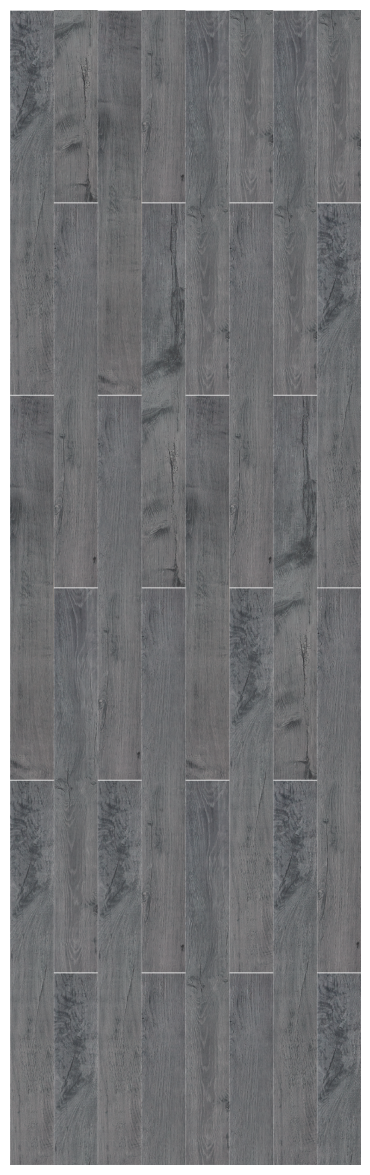

In [ ]:
import matplotlib.pyplot as plt

for col in range(0, pattern_width, board_width):
    for row in range(0, pattern_height+1, board_height):
        img = get_image(board_group, folder_path)
        if (col // board_width) % 2 == 1:
            pattern_image.paste(img, (col, row - board_height // 2))
        else:
            pattern_image.paste(img, (col, row))

plt.figure(figsize=(10, 15))
plt.imshow(pattern_image)
plt.axis('off')
plt.show()

pattern_image.save("pattern_image.png")